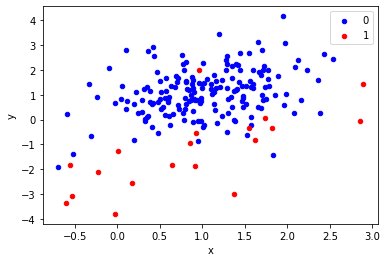

In [2]:
# generate 200 observation with x, y numerical variables and z class variable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# generate 200 observation with x, y numerical variables and z class variable with 90% of observations being class 0 and 10% being class 1
X, y = datasets.make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=1)

# create a dataframe with the data
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

# plot the data
colors = {0:'blue', 1:'red'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()



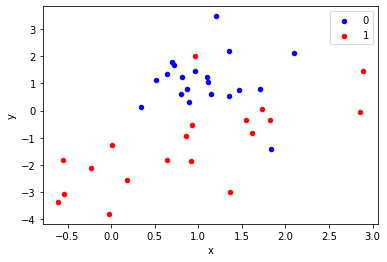

In [4]:
# rebalance the data so that 50% of observations are class 0 and 50% are class 1 using random undersampling

# count the number of observations in each class
df['label'].value_counts()

# divide the data into two dataframes, one for each class
df_class_0 = df[df['label'] == 0]
df_class_1 = df[df['label'] == 1]

# undersample from class 0
df_class_0_under = df_class_0.sample(20)

# concatenate the two dataframes
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

# plot the data
colors = {0:'blue', 1:'red'}
fig, ax = plt.subplots()
grouped = df_test_under.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()



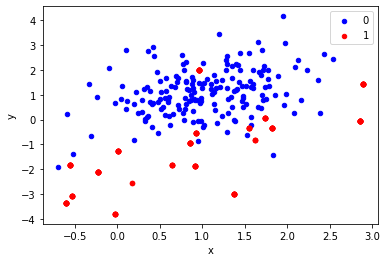

In [5]:
# rebalance the data so that 50% of observations are class 0 and 50% are class 1 using random oversampling


# oversample from class 1  
df_class_1_over = df_class_1.sample(180, replace=True)

# concatenate the two dataframes
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

# plot the data
colors = {0:'blue', 1:'red'}
fig, ax = plt.subplots()
grouped = df_test_over.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()



In [4]:
# rebalance the data so that 50% of observations are class 0 and 50% are class 1 using SMOTE


from imblearn.over_sampling import SMOTE

# divide the data into two dataframes, one for each class
df_class_0 = df[df['label'] == 0]
df_class_1 = df[df['label'] == 1]

# oversample from class 1
X_resampled, y_resampled = SMOTE().fit_resample(df_class_1[['x', 'y']], df_class_1['label'])
df_class_1_over = pd.DataFrame(dict(x=X_resampled[:,0], y=X_resampled[:,1], label=y_resampled))

# concatenate the two dataframes
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

# plot the data
colors = {0:'blue', 1:'red'}
fig, ax = plt.subplots()
grouped = df_test_over.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()





ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

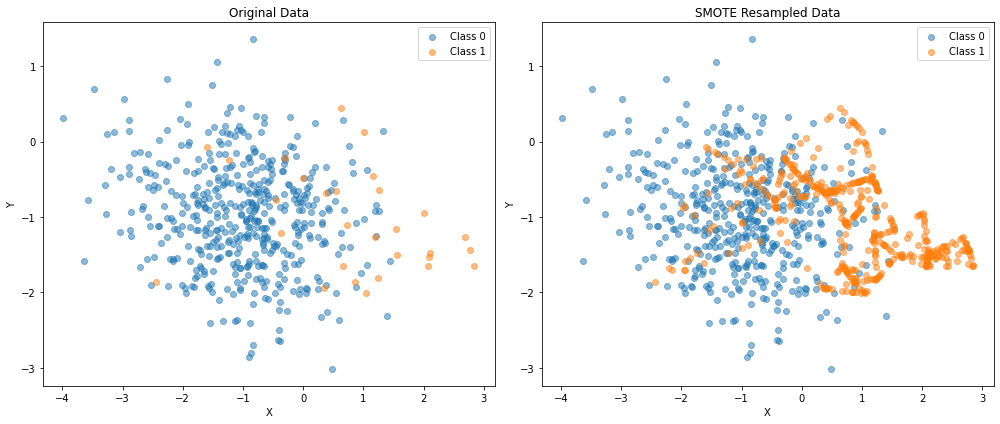

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Generate a sample imbalanced dataset (you should replace this with your actual data)
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.95, 0.05], random_state=47)

# Apply SMOTE to the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Plot the original and resampled data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.5)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Class 1', alpha=0.5)
plt.title('SMOTE Resampled Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

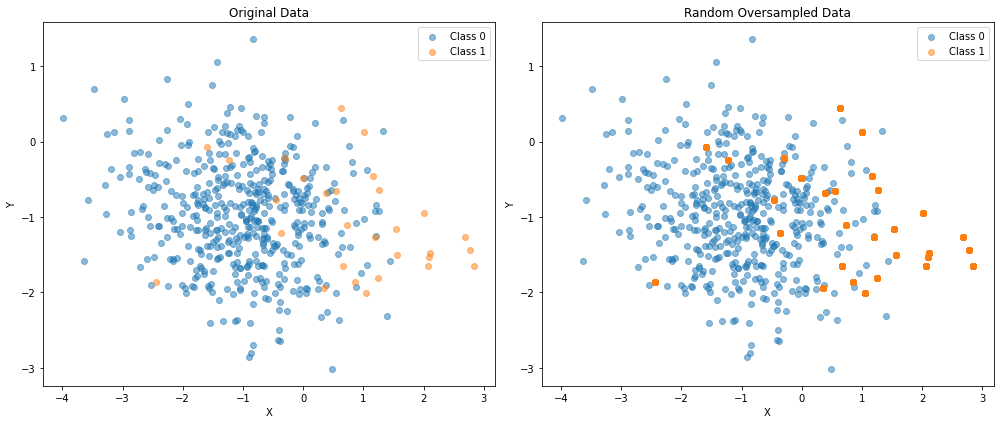

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# Replace this with your actual data loading code
# Assuming you have X, y loaded from your dataset
# X should be a 2D array of numerical features
# y should be a 1D array of class labels

# Apply random oversampling to the dataset
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Plot the original and oversampled data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.5)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Class 1', alpha=0.5)
plt.title('Random Oversampled Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()


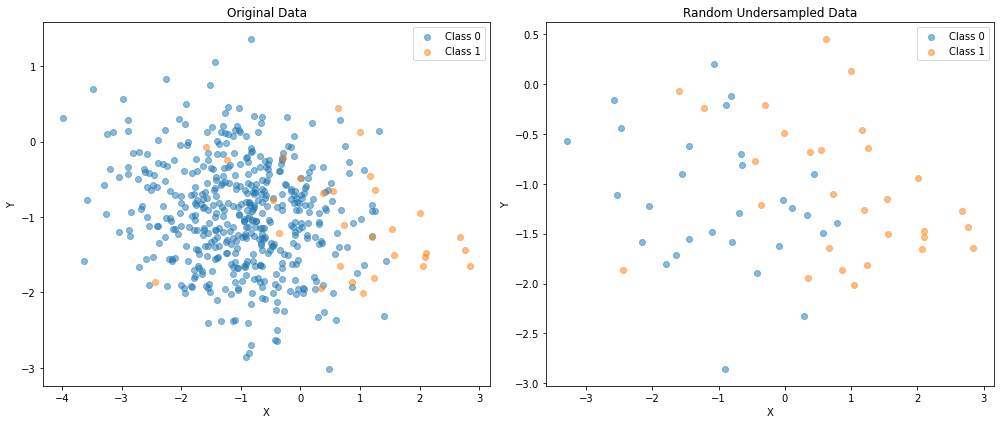

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

# Replace this with your actual data loading code
# Assuming you have X, y loaded from your dataset
# X should be a 2D array of numerical features
# y should be a 1D array of class labels

# Apply random undersampling to the dataset
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Plot the original and undersampled data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.5)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Class 1', alpha=0.5)
plt.title('Random Undersampled Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()
